In [2]:
import pandas as pd
df = pd.read_csv('../../data/cleandata/clean_data.csv')

In [3]:
a = sorted(df.PULocationID.unique())
b = sorted(df.DOLocationID.unique())

In [4]:
import fiona
import shapely
from shapely.geometry import shape
poly_list = []
shp_file = '../../data/taxi_zones/taxi_zones.shp'
taxi_zones = fiona.open(shp_file)
shape1 = shapely.geometry.shape(taxi_zones[0]['geometry'])
shape2 = shapely.geometry.shape(taxi_zones[1]['geometry'])
print(shape1.intersects(shape2))

False


In [5]:
import fiona
import shapely
from shapely.geometry import shape
poly_list = []
shp_file = '../../data/taxi_zones/taxi_zones.shp'
taxi_zones = fiona.open(shp_file)
adjacent = []
for i, zone in enumerate(taxi_zones):
    shape1 = shapely.geometry.shape(zone['geometry'])
    for j in range(i+1, len(taxi_zones)):
        zone2 = taxi_zones[j]
        shape2 = shapely.geometry.shape(zone2['geometry'])
        if shape1.intersects(shape2):
            adjacent.append([i+1,j+1])

In [24]:
df = pd.DataFrame(data=adjacent, columns=["zone1", "zone2"])
print(adjacent)
df.to_csv('../../data/cleandata/adjacent_zone.csv', index=False)

[[2, 30], [2, 132], [3, 32], [3, 51], [3, 81], [3, 184], [3, 185], [3, 242], [3, 254], [4, 79], [4, 148], [4, 224], [4, 232], [5, 84], [5, 99], [5, 204], [6, 115], [6, 118], [6, 214], [6, 221], [7, 146], [7, 179], [7, 193], [7, 207], [7, 223], [7, 226], [7, 260], [8, 179], [8, 223], [9, 16], [9, 73], [9, 98], [9, 121], [9, 171], [9, 192], [10, 205], [10, 215], [10, 216], [10, 218], [10, 219], [11, 14], [11, 22], [11, 67], [12, 13], [12, 88], [12, 261], [13, 231], [13, 261], [14, 67], [14, 227], [14, 228], [15, 16], [15, 171], [15, 252], [16, 64], [16, 98], [16, 171], [16, 175], [17, 37], [17, 49], [17, 61], [17, 80], [17, 217], [17, 225], [18, 20], [18, 94], [18, 136], [18, 174], [18, 241], [19, 64], [19, 101], [19, 175], [19, 191], [20, 31], [20, 47], [20, 78], [20, 94], [20, 174], [21, 22], [21, 26], [21, 108], [21, 123], [21, 178], [22, 26], [22, 67], [23, 99], [23, 118], [23, 156], [23, 187], [23, 251], [24, 41], [24, 43], [24, 151], [24, 166], [25, 33], [25, 40], [25, 52], [25, 65

In [7]:
adjacent2 = adjacent + [[6, 14], [12, 195], [66, 209], [66, 232], [232, 256], [145, 233], [140, 202], [193, 202], [8, 194], [74, 194], [168, 194], [74, 168],
             [42, 247], [119, 120], [235, 120], [127, 136], [128, 153], [128, 220], [27, 154], [2, 117], [2, 201], [2, 124], [15, 208], [208, 252],
             [199, 223], [208, 250], [46, 184], [75, 194], [105, 195], [1, 156]]

In [17]:
df2 = pd.DataFrame(data=adjacent2, columns=["zone1", "zone2"])
df2.to_csv('../../data/cleandata/adjacent_zone2.csv', index=False)

In [65]:
from random import random
import networkx as nx
G = nx.Graph()
for j in range(len(adjacent)):
    G.add_node(j)
for i in adjacent:
    G.add_edge(i[0], i[1], weight=1)

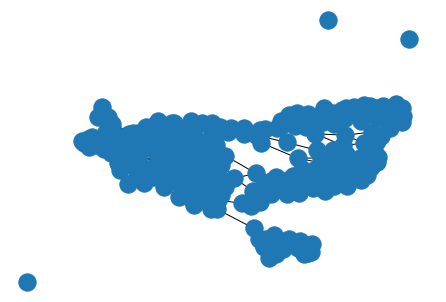

In [20]:
from random import random
import networkx as nx
G = nx.Graph()
for j in range(263):
    G.add_node(j)
for i in adjacent2:
    G.add_edge(i[0], i[1], weight=1)
nx.draw(G)

In [13]:
list(G.adjacency())

[(0, {}),
 (1, {156: {0: {'weight': 1}}}),
 (2,
  {30: {0: {'weight': 1}},
   132: {0: {'weight': 1}},
   117: {0: {'weight': 1}},
   201: {0: {'weight': 1}},
   124: {0: {'weight': 1}}}),
 (3,
  {32: {0: {'weight': 1}},
   51: {0: {'weight': 1}},
   81: {0: {'weight': 1}},
   184: {0: {'weight': 1}},
   185: {0: {'weight': 1}},
   242: {0: {'weight': 1}},
   254: {0: {'weight': 1}}}),
 (4,
  {79: {0: {'weight': 1}},
   148: {0: {'weight': 1}},
   224: {0: {'weight': 1}},
   232: {0: {'weight': 1}}}),
 (5,
  {84: {0: {'weight': 1}}, 99: {0: {'weight': 1}}, 204: {0: {'weight': 1}}}),
 (6,
  {115: {0: {'weight': 1}},
   118: {0: {'weight': 1}},
   214: {0: {'weight': 1}},
   221: {0: {'weight': 1}},
   14: {0: {'weight': 1}}}),
 (7,
  {146: {0: {'weight': 1}},
   179: {0: {'weight': 1}},
   193: {0: {'weight': 1}},
   207: {0: {'weight': 1}},
   223: {0: {'weight': 1}},
   226: {0: {'weight': 1}},
   260: {0: {'weight': 1}}}),
 (8,
  {179: {0: {'weight': 1}}, 223: {0: {'weight': 1}}, 194

In [22]:
from matplotlib import pyplot as plt
fig = plt.figure(1, figsize=(200, 80), dpi=10)
nx.draw_spectral(G)

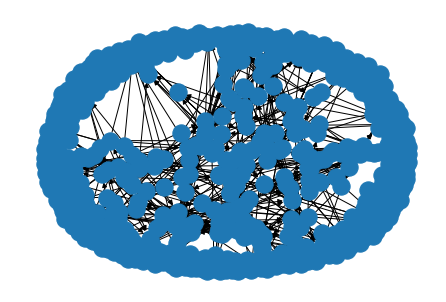

In [15]:
nx.draw(G)

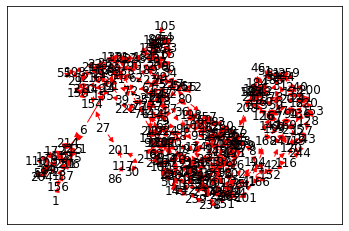

In [25]:
from matplotlib import pyplot as plt

pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
plt.show()

AttributeError: 'str' object has no attribute 'plot'